In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense


%matplotlib inline


In [2]:
import keras
keras.__version__

'2.4.3'

In [3]:
import tensorflow as tf


In [6]:
path=r"C:\Users\embedded8\Downloads\myData"
no_cls=43
print("Importing class....")
imgs=[]
labels=[]
for i in range(0,no_cls):
    mypic_list=os.listdir(path+ "/" +str(i)) #it will go through each class
    for j in mypic_list:        #it will go through each image from each class
        img=cv2.imread(path+"/"+str(i)+"/"+j) #it iterate through all the images in each folder
        imgs.append(img)
        labels.append(i)
    print(i,"Done")

Importing class....
0 Done
1 Done
2 Done
3 Done
4 Done
5 Done
6 Done
7 Done
8 Done
9 Done
10 Done
11 Done
12 Done
13 Done
14 Done
15 Done
16 Done
17 Done
18 Done
19 Done
20 Done
21 Done
22 Done
23 Done
24 Done
25 Done
26 Done
27 Done
28 Done
29 Done
30 Done
31 Done
32 Done
33 Done
34 Done
35 Done
36 Done
37 Done
38 Done
39 Done
40 Done
41 Done
42 Done


In [7]:
imgs=np.array(imgs)
labels=np.array(labels)

x_train,x_test,y_train,y_test=train_test_split(imgs,labels,test_size=0.2)

print(x_train.shape)
print(x_test.shape)


import pandas as pd
#data=pd.read_csv("")

(27839, 32, 32, 3)
(6960, 32, 32, 3)


In [7]:
#as some of the images can not be seen so we need to do some operation on image data

def preprocessing(img):
    #img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(100,100)) #resize all image into 100*100
    #img=cv2.equalizeHist(img)  #to increase contrast of image
    #img=cv2.GaussianBlur(,(5,5),0) #for smoothing the image and make blur so that it will remove unnecessary features
    img=img/255.0
    return img

In [ ]:
x_train=np.array(list(map(preprocessing,x_train)))
x_test=np.array(list(map(preprocessing,x_test)))

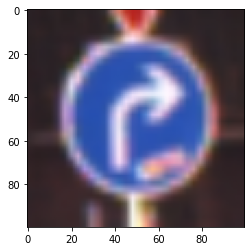

In [10]:
plt.imshow(x_train[0])  #preprocessed image

In [11]:
x_train.shape,x_test.shape

((27839, 100, 100, 3), (6960, 100, 100, 3))

In [12]:
#x_train=np.reshape(x_train,(len(x_train),100,100,1))
#x_test=np.reshape(x_test,(len(x_test),100,100,1))

In [13]:
x_train.shape,x_test.shape

((27839, 100, 100, 3), (6960, 100, 100, 3))

In [14]:
#define our model
tl_model=VGG16(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])

flat1=Flatten()(tl_model.layers[-1].output)
class1=Dense(512,activation='relu')(flat1)
output=Dense(no_cls,activation='softmax')(class1)

#redefine our model
tl_model=Model(inputs=tl_model.inputs,outputs=output)


for layer in tl_model.layers[:20]:
    layer.trainable = False
for layer in tl_model.layers[20:]:
    layer.trainable = True
    
tl_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

58892288/58889256 [==============================] - 5s 0us/step


In [15]:
tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [16]:
history=tl_model.fit(
          x_train,
          y_train,
          verbose=1,
          epochs=5,  #20
          batch_size=32,  #15
          validation_data=(x_test,y_test) )

Epoch 1/5
870/870 [==============================] - 1462s 2s/step - loss: 1.6587 - accuracy: 0.5257 - val_loss: 0.6844 - val_accuracy: 0.8029
Epoch 2/5
870/870 [==============================] - 1463s 2s/step - loss: 0.5857 - accuracy: 0.8211 - val_loss: 0.5404 - val_accuracy: 0.8362
Epoch 3/5
870/870 [==============================] - 1464s 2s/step - loss: 0.3935 - accuracy: 0.8822 - val_loss: 0.4958 - val_accuracy: 0.8422
Epoch 4/5
870/870 [==============================] - 1467s 2s/step - loss: 0.3157 - accuracy: 0.9012 - val_loss: 0.3144 - val_accuracy: 0.9045
Epoch 5/5
870/870 [==============================] - 1462s 2s/step - loss: 0.2477 - accuracy: 0.9220 - val_loss: 0.2749 - val_accuracy: 0.9129


In [22]:
tl_model.save("Traffic_sign_Clf_TL.h5")

# Predictio On A New Data

In [1]:
from keras.models import load_model
mymodel=load_model("Traffic_sign_Clf_TL.h5")
mymodel.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [59]:
def predict_class(img):
    img=cv2.resize(img,(100,100))
    img=img.reshape((1,100,100,3))
    img=img/255.0
    prediction=mymodel.predict(img)
    df=pd.read_csv("signnames.csv")
    label=df['SignName'][np.argmax(prediction,axis=1)]
    return label

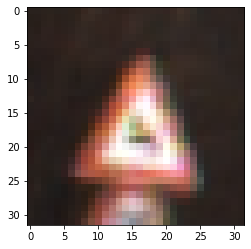

In [62]:
import cv2, numpy as np, matplotlib.pyplot as plt, pandas as pd

path=r"C:\Users\embedded8\Downloads\myData\21"
new_sign=cv2.imread(path+'/21_25680_1577672013.3537693.png',1)
new_sign=np.array(new_sign)
plt.imshow(new_sign)
#np.array(new_sign).shape

In [63]:
predict_class(new_sign)

21    Double curve
Name: SignName, dtype: object